## Week 3

#### Exercise 

* Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)
* Download the data of your choice.
* Practice data cleaning and preprocessing, handle missing values, outliers etc.
* Explore the basic statistics with pandas methods.
* Create visualizations to understand the distribution of variables.
* Identify correlations between variables using correlation matrices and/or heatmaps.
* Derive insights from your analysis. What interesting patterns or trends did you discover?

#### Solution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df_bank = pd.read_csv("../Odevler/data/bank-term-deposit.csv")

In [4]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df_bank["balance"].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

In [7]:
# Check if the duplicate values.
df_bank.duplicated().sum()

0

#### Data Visualization

##### Box-plot 

A box and whisker plot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, draw a box from the first quartile to the third quartile.

Text(0.5, 1.0, 'age')

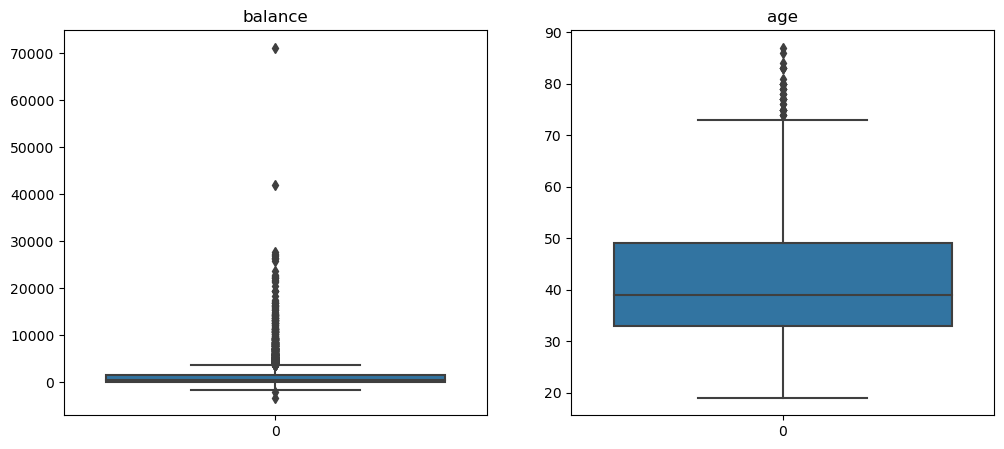

In [21]:
# Create a figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First subplot with a boxplot
sns.boxplot(df_bank["balance"],ax=axes[0])
axes[0].set_title('balance')

# Second subplot with a boxplot
sns.boxplot(df_bank["age"],ax=axes[1])
axes[1].set_title('age')


#### Countplot 

Countplot, show the counts of observations in each categorical bin using bars.

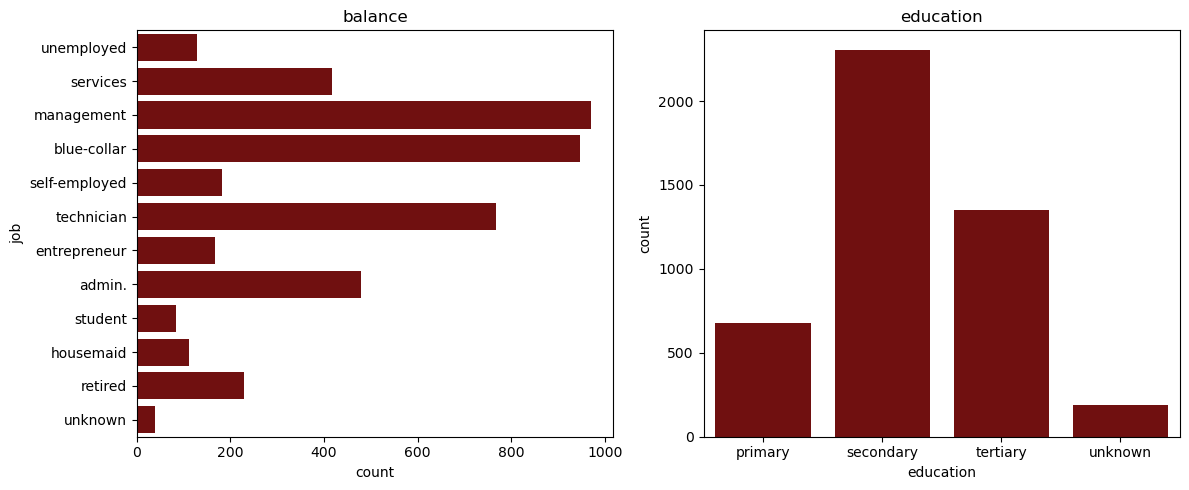

In [28]:
# Create a figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First subplot with a boxplot
sns.countplot(data=df_bank,
              y="job",
              color ='maroon',
              ax=axes[0])
axes[0].set_title('balance')

# Second subplot with a boxplot
sns.countplot(data=df_bank,
              x="education",
              color ='maroon',
              ax=axes[1])
axes[1].set_title('education')

# Adjust space between subplots
plt.tight_layout()

##### Lollipop Chart

Lollipop plot is basically a barplot, where the bar is transformed in a line and a dot .

Text(0, 0.5, 'Frequency of the Months')

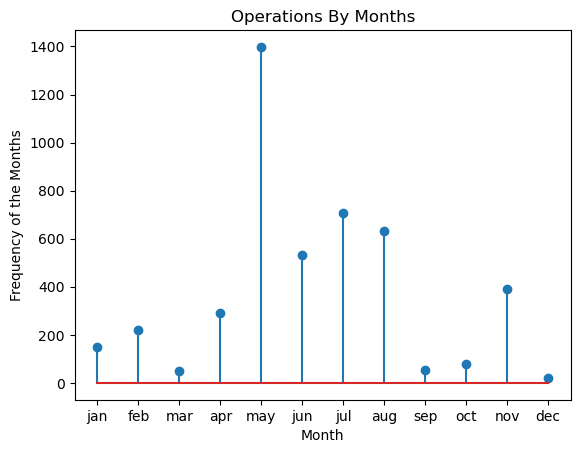

In [29]:
# Value index separation was performed by converting to a DataFrame, and it was reindexed for sorting by months.
months = pd.DataFrame(df_bank["month"].value_counts().reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']))

plt.stem( months.index,months.values)
plt.title("Operations By Months")
plt.xlabel("Month")
plt.ylabel("Frequency of the Months")

##### Pie Chart 

Pie chart is a circular statistical graphic that is divided into slices to illustrate numerical proportions.

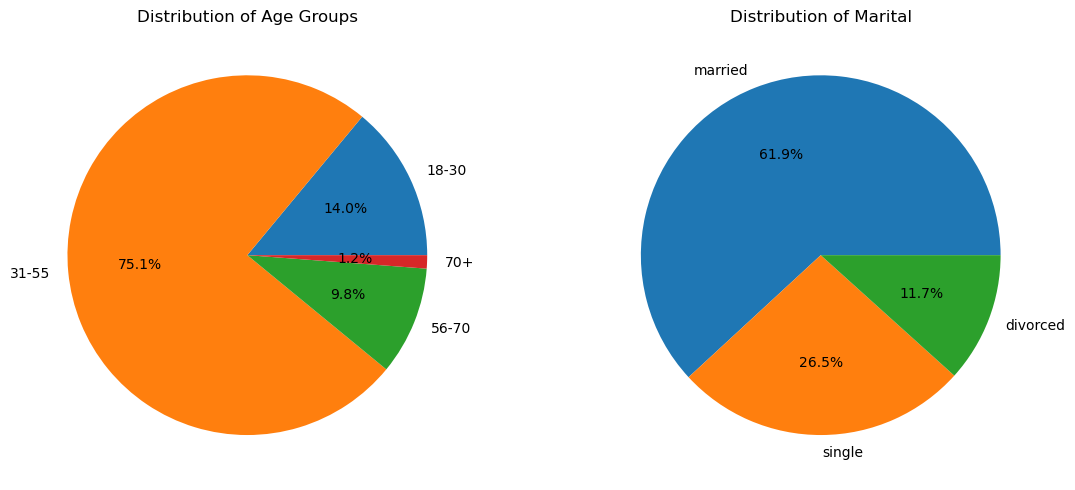

In [37]:
# Create a figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First subplot with a boxplot
df_bank["bins"] = pd.cut(df_bank["age"], bins= [18,30,55,70,100])
groups = df_bank.groupby("bins").size()
axes[0].pie(groups,
        labels=["18-30", "31-55","56-70","70+"],
        autopct='%1.1f%%')
axes[0].set_title("Distribution of Age Groups")

# Second subplot with a pie chart for the distribution of marital status
marital_counts = df_bank["marital"].value_counts()
axes[1].pie(marital_counts.to_numpy(),  # Convert to NumPy array
            labels=marital_counts.index,
            autopct='%1.1f%%')
axes[1].set_title('Distribution of Marital')

# Adjust space between subplots
plt.tight_layout()

##### Heatmap

A heatmap is a graphical representation of data where values in a matrix are represented as colors.

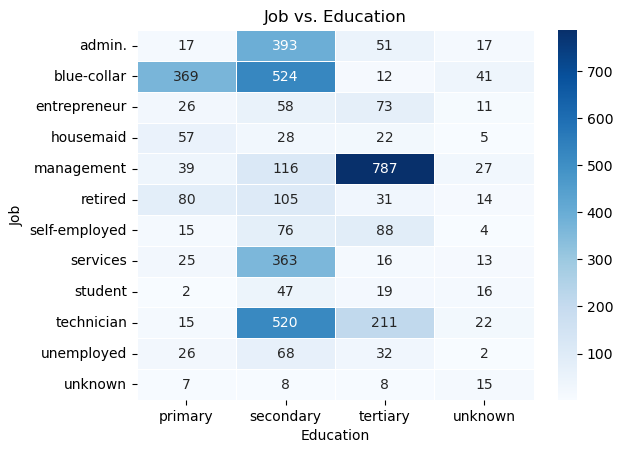

In [149]:
# Creating a cross-tabulation
cross_df = pd.crosstab(df_bank["job"],df_bank["education"])

"""
annot = If True, write the data value in each cell.
cmap = Colormap.
fmt = Format. int, float vs.
linewitdhs = Width of the lines that will divide each cell.
"""

# Visualization
sns.heatmap(cross_df, annot=True, cmap='Blues', fmt='d', linewidths=.5)
plt.title('Job vs. Education')
plt.xlabel('Education')
plt.ylabel('Job')
plt.show()

##### Scatter Plot

A scatter plot is a graphical representation of individual data points in a two-dimensional space, where each point on the plot represents the values of two different variables.

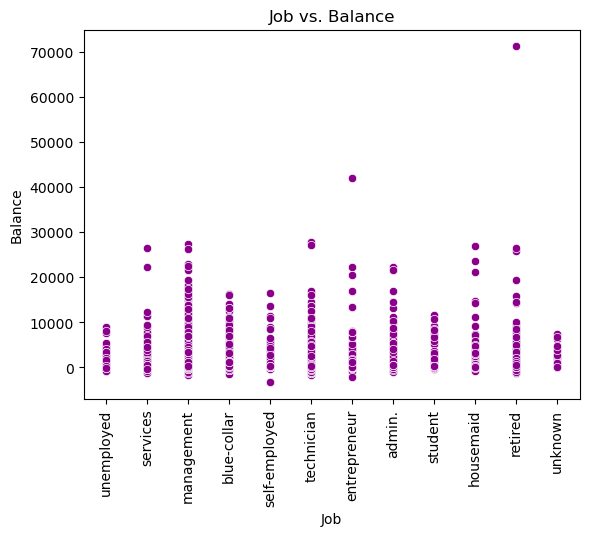

In [38]:
sns.scatterplot(x="job",
                y= "balance",
                data= df_bank,
                color = (0.545, 0.000, 0.545))
plt.title("Job vs. Balance")
plt.xlabel("Job")
plt.ylabel("Balance")
# This method prevents mixed writings by altering the rotation of the texts.
plt.xticks(rotation= 90)
plt.show()

##### Violin Plot

A violin plot is a data visualization that combines elements of a box plot and a kernel density plot, providing insights into the distribution, median, and quartiles of a dataset.

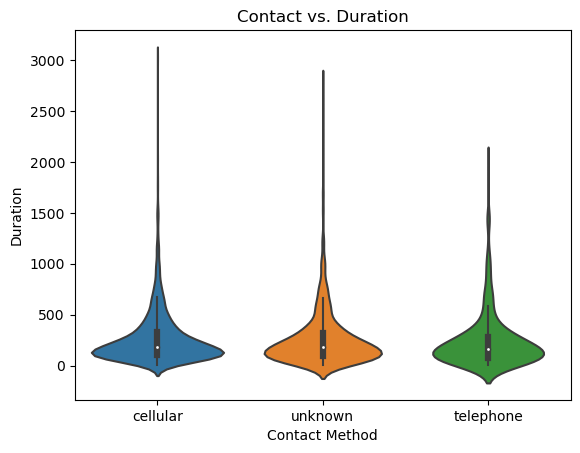

In [39]:
sns.violinplot(x='contact', y='duration', data=df_bank)
plt.title('Contact vs. Duration')
plt.xlabel('Contact Method')
plt.ylabel('Duration')
plt.show()

##### Strip Plot 

"Strip plot" is a type of graph where individual data points, each associated with a categorical variable, are displayed as dots along a horizontal axis. 

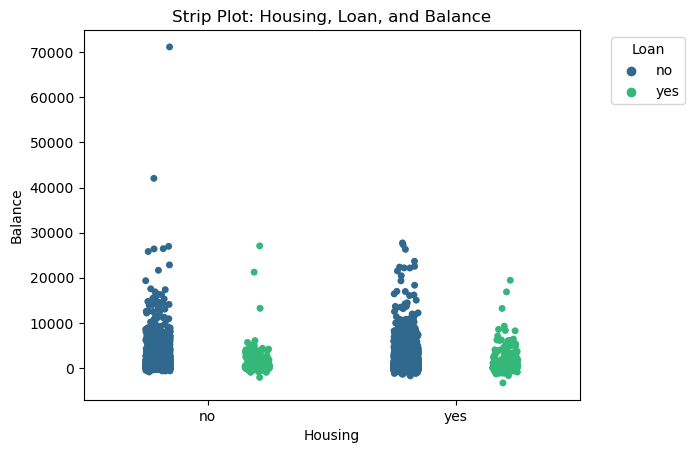

In [40]:
sns.stripplot(x='housing', y='balance', hue='loan', data=df_bank, palette='viridis', dodge=True, jitter=True)
plt.title('Strip Plot: Housing, Loan, and Balance')
plt.xlabel('Housing')
plt.ylabel('Balance')
plt.legend(title='Loan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()